### Problem Statement

The standard formula to convert Fahrenheit ($F$) to Celsius ($C$) is: 

$$
C = (F - 32) \times \frac{5}{9}
$$

However, calculating $\frac{5}{9}$ mentally can be cumbersome, especially without a calculator. To simplify, I developed an approximation that replaces $\frac{5}{9}$ with $\frac{1}{2}$, resulting in:

$$
C \approx (F - 32) \times \frac{1}{2}
$$

This approximation enables a quick, rough estimate of Celsius from Fahrenheit. While this approach can be helpful for fast calculations, it sometimes deviates noticeably from the accurate value, particularly at higher absolute temperatures.

For example:
- **$107°F$** converts accurately to **$42°C$** using the standard formula, which, in my hometown, we consider "scorching hot." However, the approximation gives **$37.5°C$**—a significant drop that we would refer to as a "cooler scorching," illustrating a distinct difference in perceived temperature.
- **$50°F$** accurately converts to **$10°C$**, while the approximation gives **$9°C$**. This minor difference is often acceptable, as weather apps, for instance, may display temperatures within $ ±1°C $ as "feels like" values.

Clearly, this approximation performs better at lower Fahrenheit values, where the difference between $\frac{5}{9}$ and $\frac{1}{2}$ is less impactful. As Fahrenheit values increase in absolute terms, however, the errors become more pronounced, which we will demonstrate below.

### Objective

In this project, we aim to explore and analyze this simple yet interesting approximation. We will evaluate its accuracy across different temperature ranges, identifying where it performs adequately and where it introduces significant discrepancies. This exploration will not only quantify the errors but will also provide insights into the practical utility of the approximation across typical temperature ranges.


To investigate the differences between the standard and approximate methods of converting Fahrenheit (°F) to Celsius (°C), we will start by defining two functions:

1. **Accurate Conversion Function**: This function will use the standard formula:
   
   $$
   C = (F - 32) \times \frac{5}{9}
   $$
   
   It will provide the precise Celsius equivalent for any Fahrenheit input.

2. **Approximate Conversion Function**: This function will use the simplified approximation:

   $$
   C \approx (F - 32) \times \frac{1}{2}
   $$
   
   This will allow us to quickly estimate Celsius values, although it may introduce error, especially at higher temperatures.

In [58]:
#

hotF = 107
coolF = 50

def FtoC(degF):
	return round((degF - 32) * 5/9)

print(f"{hotF}°F is equivalent to {FtoC(hotF)}°C.")
print(f"{coolF}°F is equivalent to {FtoC(coolF)}°C.")

107°F is equivalent to 42°C.
50°F is equivalent to 10°C.


In [59]:
def approxFtoC(degF):
	return round((degF - 32) * 1/2)

print(f"{hotF}°F is approximately equivalent to {approxFtoC(hotF)}°C.")
print(f"{coolF}°F is approximately equivalent to {approxFtoC(coolF)}°C.")

107°F is approximately equivalent to 38°C.
50°F is approximately equivalent to 9°C.


To better understand when the difference between the accurate and approximate Fahrenheit-to-Celsius conversions becomes significant, we need to:

- **Identify temperature ranges** where the approximation closely matches the accurate calculation.
- **Spot points of divergence** where the approximation becomes less reliable.
- **Quantify the error** at various temperature levels, providing a clear picture of the approximation’s limitations.

### Experimental Setup and Visualization Plan

To thoroughly analyze the accuracy of our Fahrenheit-to-Celsius approximation, we will test values across a wide range of temperatures, from $-250°F$ to $250°F$. This symmetrical range ensures that we capture both extremely low and high temperatures, far beyond everyday weather, including temperatures well above the boiling point of water ($100°C$ or $212°F$).

### Graphs for Visual Comparison

To fully explore the relationship between the accurate and approximate conversion methods, we will create three types of graphs:

1. **Direct Comparison Plot**:  
   We will plot both the accurate function $ f(F) $ and the approximate function $ g(F) $ on the same graph as functions of Fahrenheit (F). This graph, showing $ C = f(F) $ and $ C = g(F) $, will help us visualize how the two methods align across a wide temperature range.

2. **Absolute Comparison Plot**:  
   Next, we’ll plot the absolute values $ |f(F)| $ and $ |g(F)| $ to better visualize discrepancies in magnitude. By focusing on absolute values, we can more easily see where the approximation deviates significantly from the accurate conversion, regardless of positive or negative signs.

3. **Error Plot**:  
   Lastly, we’ll create an error graph that shows the absolute error as a function of Fahrenheit. The error will be calculated as $ |f(F) - g(F)| $, plotted across the range of $°F$ values. This plot will allow us to pinpoint exactly where the approximation becomes unreliable and quantify the extent of its deviation.




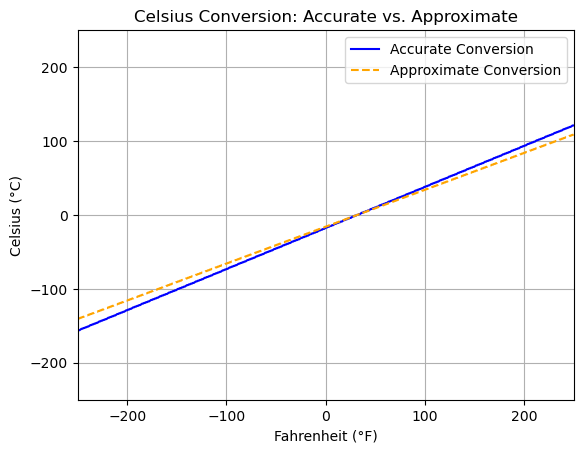

In [60]:
import numpy as np
import matplotlib.pyplot as plt


F_values = np.linspace(-250, 250, 500)
moreF_values = np.linspace(-250, 250, 10000)

# celsius values using the accurate and approximate functions
C_accurate = np.array([FtoC(F) for F in F_values])
C_approx = np.array([approxFtoC(F) for F in F_values])

moreC_accurate = np.array([FtoC(F) for F in moreF_values])
moreC_approx = np.array([approxFtoC(F) for F in moreF_values])

# absolute values for direct magnitude comparison
abs_C_accurate = np.abs(C_accurate)
abs_C_approx = np.abs(C_approx)

# absolute error
error = np.abs(C_accurate - C_approx)
more_error = np.abs(moreC_accurate - moreC_approx)

axis_range = (-250, 250)
reduced_axis_range = (-25,75)
error_axis_range = (0,20)

# 1. direct comparison plot
plt.plot(F_values, C_accurate, label="Accurate Conversion", color="blue")
plt.plot(F_values, C_approx, label="Approximate Conversion", color="orange", linestyle="--")
plt.title("Celsius Conversion: Accurate vs. Approximate")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Celsius (°C)")
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.legend()
plt.grid()
plt.show()



As we can see, the resulting function behaves symmetrically around the point $ (32, 0) $ since $ 32^\circ \text{F} $ corresponds to $ 0^\circ \text{C} $. To the right of this origin, the approximate conversion consistently yields values lower than the accurate Celsius values, indicating that an upward adjustment would be needed to match the true temperature. Conversely, on the left side, the approximation results in values higher than the accurate Celsius values, requiring a downward adjustment. This symmetry highlights an "odd" behavior of the approximation relative to this reference point.


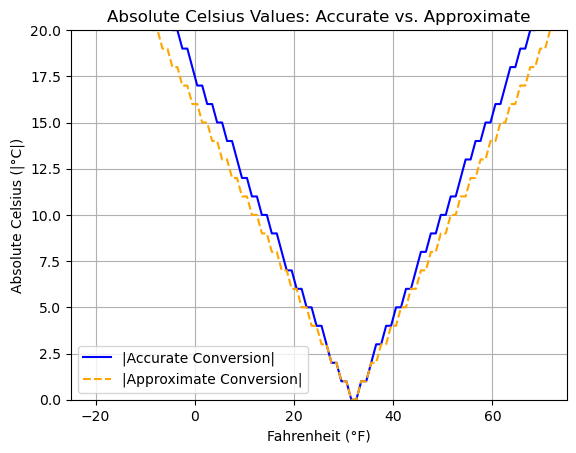

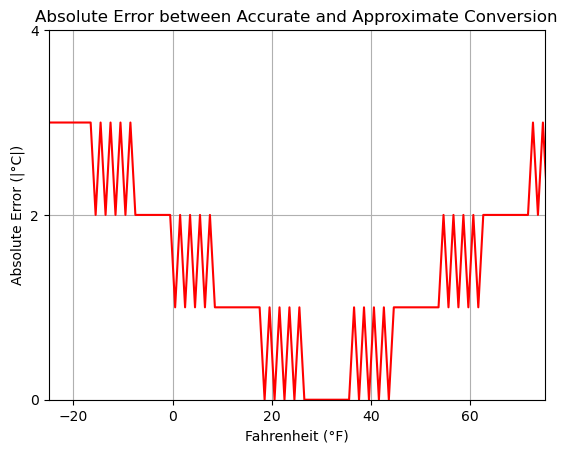

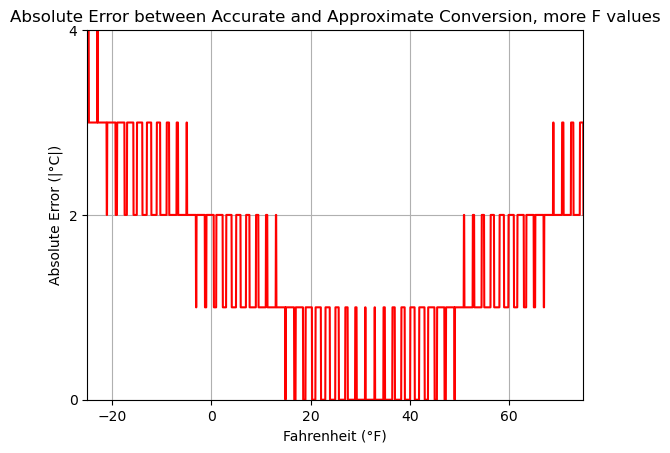

In [61]:
# 2. absolute value comparison plot
plt.plot(F_values, abs_C_accurate, label="|Accurate Conversion|", color="blue")
plt.plot(F_values, abs_C_approx, label="|Approximate Conversion|", color="orange", linestyle="--")
plt.title("Absolute Celsius Values: Accurate vs. Approximate")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Absolute Celsius (|°C|)")
plt.xlim(reduced_axis_range)
plt.ylim(error_axis_range)
plt.legend()
plt.grid()
plt.show()

# 3. error plot with limited y-axis range and subdivisions. 2 VERSIONS

# little F values
plt.plot(F_values, error, color="red") 
plt.title("Absolute Error between Accurate and Approximate Conversion")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Absolute Error (|°C|)")
plt.xlim(reduced_axis_range)
plt.ylim((0,4))  
plt.yticks(np.arange(0, 5, 2)) 
plt.grid()
plt.show()

# a lot of F values
plt.plot(moreF_values, more_error, color="red") 
plt.title("Absolute Error between Accurate and Approximate Conversion, more F values")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Absolute Error (|°C|)")
plt.xlim(reduced_axis_range)
plt.ylim((0,4))  
plt.yticks(np.arange(0, 5, 2)) 
plt.grid()
plt.show()


### Observations and Analysis

After plotting the **Absolute Value Comparison** and **Absolute Error** graphs, and zooming in by adjusting the **x-axis** and **y-axis** ranges to focus on the details, we observe a strange **stair-step pattern** in the data. Between each "stair" of the graph, the curve oscillates, and these oscillations become more aggressive when we increase the number of points in the `linspace`, instead of smoothing out as expected (at first, you'd expect that the oscillations are just a form of the graph trying to link the points, though it isn't specified in any line of code).

### Explanation of the "Stair-Step Pattern"

This stair-step effect, which becomes more pronounced as the number of points in the `linspace` increases, is primarily due to the way **rounding** works in our calculations. The key here is that, in both the accurate and approximate conversions, we round the Celsius values to the nearest integer using the `round()` function.

1. **Rounding in the Approximate Conversion**:  
   For every Fahrenheit value, the approximation `C ≈ (F - 32) * 1/2` is calculated first, and then rounded to the nearest integer. The rounding causes small jumps between values that accumulate across the range of temperatures, resulting in a **stair-step pattern**.

2. **Increased Oscillations**:  
   When we use a higher number of points in the `linspace` (which increases the resolution of the data), the rounding errors become more noticeable. Instead of having smooth transitions between values, the rounded values "snap" from one integer to the next, creating a pattern where the curve oscillates between values, and the error seems to oscillate as well.

3. **Accumulation of Rounding Error**:  
   Because the Celsius values are rounded to the nearest integer at each step, each new point in the range may either be slightly overestimated or underestimated compared to the actual conversion. As the number of points increases, these small errors accumulate, leading to the observed **stair-step pattern**.



In [62]:

def FtoC(degF):
	return (degF - 32) * 5/9

print(f"{hotF}°F is equivalent to {FtoC(hotF)}°C.")
print(f"{coolF}°F is equivalent to {FtoC(coolF)}°C.")

def approxFtoC(degF):
	return (degF - 32) * 1/2

print(f"{hotF}°F is approximately equivalent to {approxFtoC(hotF)}°C.")
print(f"{coolF}°F is approximately equivalent to {approxFtoC(coolF)}°C.")

107°F is equivalent to 41.666666666666664°C.
50°F is equivalent to 10.0°C.
107°F is approximately equivalent to 37.5°C.
50°F is approximately equivalent to 9.0°C.


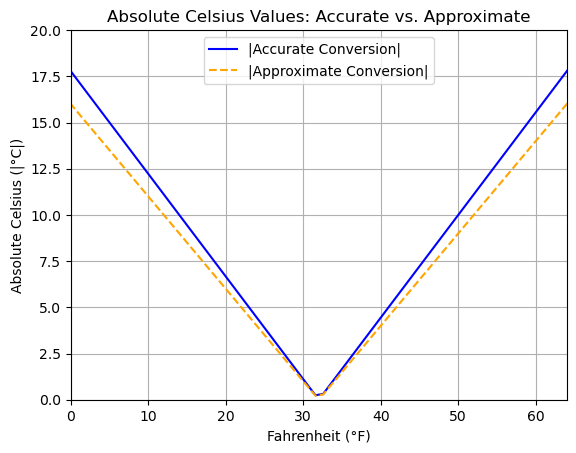

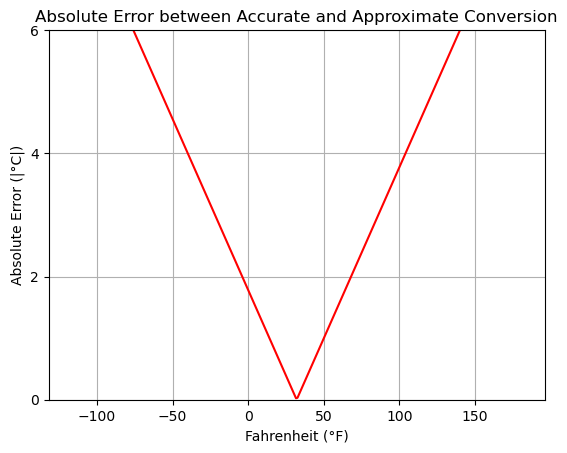

In [63]:
F_values = np.linspace(-250, 250, 500)

# celsius values using the accurate and approximate functions
C_accurate = np.array([FtoC(F) for F in F_values])
C_approx = np.array([approxFtoC(F) for F in F_values])


# absolute values for direct magnitude comparison
abs_C_accurate = np.abs(C_accurate)
abs_C_approx = np.abs(C_approx)

# absolute error
error = np.abs(C_accurate - C_approx)

axis_range = (-250, 250)
reduced_axis_range = (0,64)
reduced_axis_range_error = (-132,196)
error_axis_range = (0,20)
reduced_error_range = (0,6)

# 2. absolute value comparison plot
plt.plot(F_values, abs_C_accurate, label="|Accurate Conversion|", color="blue")
plt.plot(F_values, abs_C_approx, label="|Approximate Conversion|", color="orange", linestyle="--")
plt.title("Absolute Celsius Values: Accurate vs. Approximate")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Absolute Celsius (|°C|)")
plt.xlim(reduced_axis_range)
plt.ylim(error_axis_range)
plt.legend()
plt.grid()
plt.show()

# 3. Error plot.
plt.plot(F_values, error, color="red") 
plt.title("Absolute Error between Accurate and Approximate Conversion")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Absolute Error (|°C|)")
plt.xlim(reduced_axis_range_error)
plt.ylim(reduced_error_range)  
plt.yticks(np.arange(0, 7, 2)) 
plt.grid()
plt.show()

Above are the updated plots where the `FtoC` and `approxFtoC` functions are no longer rounded. By maintaining the precision of the Celsius values, the staircase pattern in the graphs is removed, and the curves are now much smoother. The error plot also reflects a more consistent deviation, providing a clearer comparison between the accurate and approximate conversion methods.

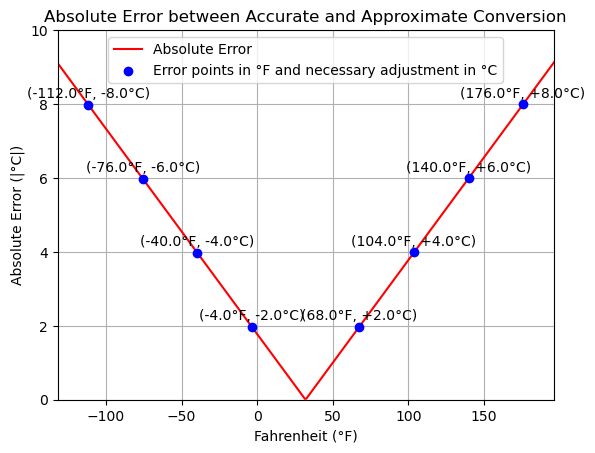

In [64]:
# identify points where error increments by 2 (error values of 2, 4, 6, ...)
target_errors = np.arange(2, np.max(error), 2)  # start from 2 and go up by 2
highlighted_points = []

for target in target_errors:
    # we fiind indices where the error is close to the target value
    close_points = np.where(np.abs(error - target) < 0.028)[0]  # 0.028 was chosen after multiple tries, as for example when we chose 0.1, a few points end up verifying the approximation, thus stacking up on the graph
    highlighted_points.extend(close_points)

# highlighted F values and corresponding error values
highlighted_F = F_values[highlighted_points]
highlighted_error = error[highlighted_points]

# error graph
plt.plot(F_values, error, color="red", label="Absolute Error")
plt.title("Absolute Error between Accurate and Approximate Conversion")
plt.xlabel("Fahrenheit (°F)")
plt.ylabel("Absolute Error (|°C|)")
plt.xlim(reduced_axis_range_error)
plt.ylim(reduced_error_range)
plt.yticks(np.arange(0, 11, 2))
plt.grid()

# highlighted points
plt.scatter(highlighted_F, highlighted_error, color="blue", zorder=5, label="Error points in °F and necessary adjustment in °C")

# Annotate the highlighted points with corresponding F values
for (x, y) in zip(highlighted_F, highlighted_error):
    if x > 0:
        plt.annotate(f"({int(round(x)):.1f}°F, +{int(round(y)):.1f}°C)", (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
    else:
        plt.annotate(f"({int(round(x)):.1f}°F, {-int(round(y)):.1f}°C)", (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.legend()
plt.show()

### Observing Error Patterns in the Approximate Conversion Plot

After plotting the absolute error graph, we can observe an interesting pattern: the highlighted error points are distanced by multiples of $36°F$ from a focal point at $32°F$, where the error is zero. Moving to the right from $32°F$, the error points occur at $68°F$, $104°F$, and so on — specifically, at $ 32 + 36, 32 + 2 \times 36 $, etc. This pattern mirrors symmetrically to the left of $32°F$.

This regular spacing aligns with the following calculation of the absolute error in our approximation:
$$
\text{Absolute Error} = \left| \text{Accurate Celsius} - \text{Approximate Celsius} \right| = \left| \frac{5}{9}(F - 32) - \frac{1}{2}(F - 32) \right|
$$
Simplifying, we get:
$$
\text{Absolute Error} = \left| \frac{1}{18} (F - 32) \right|
$$
Thus, every time $°F$ increases or decreases by a multiple $m$ of 36 from $32°F$, the absolute error changes by:
$$
\frac{36}{18} = 2 \times m \times ^\circ \text{C}
$$

This insight explains the regular increment/decrement pattern of $2°C$ we observe along the error curve.


### Conclusion

In this mini-project, we explored the approximation of Fahrenheit to Celsius conversions, compared it with the accurate formula, and examined the resulting error patterns. By analyzing the absolute error, we identified that errors increase in increments of $ 2°C $ (a value that we chose out of our own precision tolerance) at specific Fahrenheit points — those spaced at $ 36°F $ intervals from the "focal" $ 32°F $ point. This insight into the predictable error pattern allowed us to pinpoint these intervals on the graph, giving us a clearer understanding of when and how the approximation diverges from the accurate conversion.

In the end, converting between Fahrenheit and Celsius is bound to require some mental gymnastics! If you’re not content with the simple 1/2 approximation, you’d face two options:

1. Memorize the Fahrenheit points (like $68°F$, $104°F$, $-4°F$, $-140°F$...) where you add or subtract $2°C$ to adjust the approximation.
2. Mentally keep adding or subtracting multiples of $36°F$ to determine how many $2°C$ adjustments you’d need as you get closer or further from $32°F$.

Either way, it’s a lot of mental effort! So, if the 1/2 approximation doesn’t meet your needs and you’re not up for memorizing or mental math acrobatics, there’s always an easier path: just use a Google converter or a calculator. Problem solved! 😆
